# <u> Introduction </u>

Hello! This is an EDA that I'm doing as a refresher and practice for myself :)

Please excuse me if there are some methods or codes that are wrong, I am still learning after all. Thank you!

This is a dataset from Kaggle. The purpose of this EDA is to analyze the summary of grocery sales and generate basic insights.

Dataset Credits: https://www.kaggle.com/datasets/mohamedharris/supermart-grocery-sales-retail-analytics-dataset

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from tabulate import tabulate
import matplotlib.patches as patches

In [2]:
#reading the file

grocery_data = pd.read_csv('Supermart_Grocery_Sales.csv') 


Dataset:

- This is a fictional dataset on orders placed by customers for a grocery store living in the state of Tamil Nadu, India.

### Data Exploration

In [3]:
grocery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [4]:
grocery_data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


There are two columns that I am interested in before delving deeper: City and State.

However before that, let's check if there any missing values in the dataset.


In [5]:
#Checking if any column has a missing data, and if so how many.

grocery_data.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

Seems like there is no null data. Let's move on

In [6]:
## Looking at How many different states there are:

grocery_data["State"].value_counts()


Tamil Nadu    9994
Name: State, dtype: int64

From the cell above, it seems that the entire dataset is based off the state of Tamil Nadu.

Hence, we can drop this column as it is a repeated value.

In [7]:
grocery_data.drop(['State'], axis=1, inplace = True)

grocery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 780.9+ KB


In [8]:
## Now , let's look at the Region next.

grocery_data["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1619
North         1
Name: Region, dtype: int64

As seen above there's only 'North Region'. As compared the numbers in the other regions, it's quite low. 

A possible explanation could be that this might be a mistake in the data. Hence, let's remove this region.

In [9]:
#Dropping North

grocery_data.drop((grocery_data[grocery_data['Region'] == 'North']).index , inplace=True)

grocery_data["Region"].value_counts()


West       3203
East       2848
Central    2323
South      1619
Name: Region, dtype: int64

Now, to make it easier for Data Exploration, I wish to add an two additional column based off the 'Date' Column.

A "Year" and a "Month" Column

In [10]:
# Year Column

# We know that the "Order Date" Column is an Object dtype.

# UsingDatetimeIndex() to extract year
grocery_data['Year'] = pd.DatetimeIndex(grocery_data['Order Date']).year

#Checking Dataframe
grocery_data.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,Year
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,2016
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,2015


In [11]:
# Month Column

# Similar method as above

# UsingDatetimeIndex() to extract year
grocery_data['Month'] = pd.DatetimeIndex(grocery_data['Order Date']).month

#Checking Dataframe
grocery_data.head()

#Double-checked with original dataset on Kaggle that the Order Date is in the Month-Date-Year Format.

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,Year,Month
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,2017,11
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,2017,6
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,2016,10
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,2016,10
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,2015,6


Well, now let's drop the Order Date Column as we have already gotten our new Columns.

In [12]:
grocery_data.drop(['Order Date'], axis=1, inplace = True)

In [13]:
# Confirming the columns.

grocery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 1 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9993 non-null   object 
 1   Customer Name  9993 non-null   object 
 2   Category       9993 non-null   object 
 3   Sub Category   9993 non-null   object 
 4   City           9993 non-null   object 
 5   Region         9993 non-null   object 
 6   Sales          9993 non-null   int64  
 7   Discount       9993 non-null   float64
 8   Profit         9993 non-null   float64
 9   Year           9993 non-null   int64  
 10  Month          9993 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 858.9+ KB


Now, let's get started on some simple graphs

### Data Graphs

#### Total Sales and Profit per Region

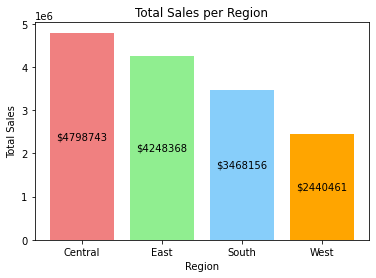

In [14]:
# Grouping the data and calculating total sales per region
# Group region -> then calculating sum of sales 
total_sales = grocery_data.groupby("Region")["Sales"].sum()

# Sort in Descending order
total_sales_sorted = total_sales.sort_values(ascending=False)

#Bar Colours
bar_colors = ['lightcoral', 'lightgreen', 'lightskyblue', 'orange']

# Plot
plt.bar(total_sales.index, total_sales_sorted, color=bar_colors)

# x-axis
plt.xlabel('Region')

# y-axis
plt.ylabel('Total Sales')

# Title 
plt.title('Total Sales per Region')

# To show value on top of bar graph. Loop through the patches and annotate the bars. 
# Since the dataset doesn't have a dollar sign in front, I added in it 
for i, value in enumerate(total_sales_sorted):
    plt.text(i, value/2, "$" + str(value), ha='center', va='center')

# Displaying the plot
plt.show()

From this bar graph, we can see that the Central Region has the most sales, followed by East, South and West.


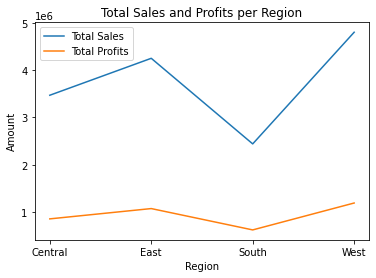

In [15]:
# Calculating total sales and profits per region
# Grouping total_profits using same method 
# total_sales can be reused from previous cell.

total_profits = grocery_data.groupby("Region")["Profit"].sum()

# Plotting total sales
plt.plot(total_sales.index, total_sales, label='Total Sales')

# Plot
plt.plot(total_profits.index, total_profits, label='Total Profits')

# x-axis
plt.xlabel('Region')

# y-axis
plt.ylabel('Amount')

# Title 
plt.title('Total Sales and Profits per Region')

# Adding a legend 
plt.legend()

# Displaying the plot
plt.show()

From the Line plot above, it seems that **the higher the sales, the more profit will be made**. In this case, we should ensure that the grocery store continue to earn more sales. 

#### Total Sales and Profit per Year

In [16]:
# Let's look at the different Years in this dataset.

grocery_data["Year"].value_counts()

2018    3312
2017    2586
2016    2102
2015    1993
Name: Year, dtype: int64

There's only four different years. This makes it easier to visualize.

In [17]:
total_profits.max()

1192004.61

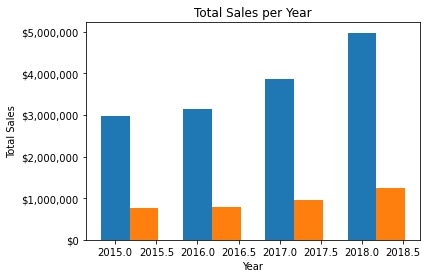

<Figure size 720x432 with 0 Axes>

In [18]:
# Need to re-group the data
# Group Year -> then calculating sum of sales & profits
total_sales = grocery_data.groupby("Year")["Sales"].sum()
total_profits = grocery_data.groupby("Year")["Profit"].sum()


# Plot bars for total sales
plt.bar(total_sales.index, total_sales, width=0.35, label='Total Sales')

# Plot bars for total profit
plt.bar(total_profits.index + 0.35, total_profits, width=0.35, label='Total Profit')

# x-axis
plt.xlabel('Year')

# y-axis
plt.ylabel('Total Sales')

# Title 
plt.title('Total Sales per Year')

# Formatting the y-axis ticks as money

# Firstly, format. Dollar sign then having a comma as seperator (easier to see) and zero decimal place.
fmt = '${x:,.0f}'

#Used StrMethodFormatter as there doesn't seem to be a formatter for currency...The closest would be to use string
tick = mtick.StrMethodFormatter(fmt)

#Gets current axis -> Y-axis -> Format it based on code above
plt.gca().get_yaxis().set_major_formatter(tick)

# Displaying the plot
plt.figure(figsize=(10, 6))
plt.show()




From this graph, we can see that business is increasing steadily over the years. 

Let's do a few more other graphs.

#### Total Sales and Profit per Category

In [19]:
# Group the data
# Group Category -> then calculating sum of sales & profits 
grouped_data = grocery_data.groupby("Category").sum()

# Extract sales and profits column
total_sales = grouped_data["Sales"]
total_profits = grouped_data["Profit"]

# Add a $ sign to  sales and profit values
# Loops through the list 
total_sales2 = ['$' + str(x) for x in total_sales]
total_profits2 = ['$' + str(y) for y in total_profits]

# Zip the data together to combine it
# put in list format to showcase in table format first
zipped_data = zip(grouped_data.index, total_sales2, total_profits2)

df2 = list(zipped_data)

print(tabulate(df2, headers=['Category','Total Sales', 'Total Profit']))


Category           Total Sales    Total Profit
-----------------  -------------  --------------
Bakery             $2112281       $528521.06
Beverages          $2085313       $525605.76
Eggs, Meat & Fish  $2267401       $567357.22
Food Grains        $2115272       $529162.64
Fruits & Veggies   $2100727       $530400.38
Oil & Masala       $2037188       $497494.01
Snacks             $2237546       $568178.85


From the table above, it seems like there are 7 different Category.

Let's put the values in a horizontal bar graph for a more clearer view.

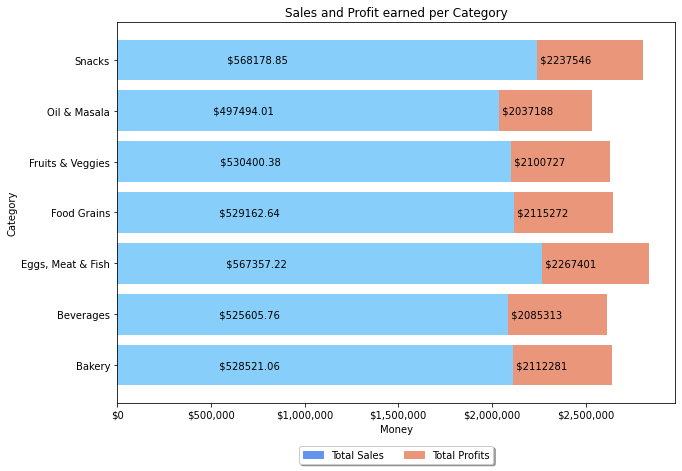

In [20]:
# Setting plot
fig, ax = plt.subplots(figsize=(10, 7))

# x-axis
ax.set_xlabel("Money")

# y-axis
ax.set_ylabel("Category")
ax.set_title("Sales and Profit earned per Category")

# Plot the data
b1 = plt.barh(grouped_data.index, total_sales, color='lightskyblue')
b2 = plt.barh(grouped_data.index, total_profits, left=total_sales, color='darksalmon')

# Formatting the x-axis as money
# Firstly, format. Dollar sign then having a comma as seperator (easier to see) and zero decimal place.
fmt = '${x:,.0f}'

# Used StrMethodFormatter as there doesn't seem to be a formatter for currency...The closest would be to use string
tick = mtick.StrMethodFormatter(fmt)

# Gets current axis -> Y-axis -> Format it based on code above
plt.gca().get_xaxis().set_major_formatter(tick)

#Texts to show value
for i, value in enumerate(total_sales):
    plt.text(value, i, " $" + str(value), ha='left', va='center')
    
for i, value in enumerate(total_profits):
    plt.text(value, i, " $" + str(value), ha='left', va='center')
    
# Need to create legend using patch...
sales_patch = patches.Patch(color='cornflowerblue', label='Total Sales')
profits_patch = patches.Patch(color='darksalmon', label='Total Profits')

# Add legend
ax.legend(handles=[sales_patch, profits_patch], loc='upper center', bbox_to_anchor=(0.5, -0.10), fancybox=True, shadow=True, ncol=5)

# Show plot, add legend
plt.show()

**Insights:**

We have already concluded from earlier that **the more the sales, the higher the profit**. 

From the graph above, it seems like the category with the highest profit and sales is "Eggs, Meat & Fish" followed by "Snacks" and "Food Grains".

The lowest profit and sales is "Oil & Masala" , "Beverages" and "Bakery".

This raises the question "How do we go about making sure these category increase in value over the years as well?"

Let's focus more in detail regarding the sale trend over time.

#### Sales Trend over Time

In [21]:
print(grouped_data["Year"])


Category
Bakery               2849582
Beverages            2823419
Eggs, Meat & Fish    3004894
Food Grains          2819455
Fruits & Veggies     2859712
Oil & Masala         2742715
Snacks               3053328
Name: Year, dtype: int64


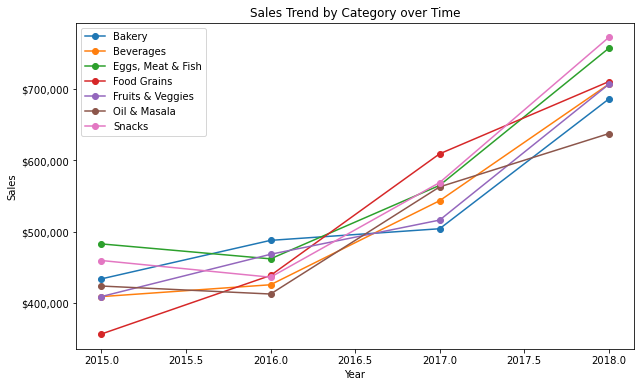

In [22]:
# Group Category, Year and calculate the sum of sales for each year
grouped_data = grocery_data.groupby(["Year", "Category"]).sum()

# Reset the index -> Year and Category back as column
grouped_data = grouped_data.reset_index()

# Setting up
fig, ax = plt.subplots(figsize=(10, 6))

# Get the different unique categories (Seven types)
categories = grouped_data['Category'].unique()

# Plotting
# Uses for loop. For every x in categories, a line will be plotted.

for category in categories:
    
    # Can't use grouped_data[Category]
    # Creates new df called category_data. Filter to access the data for each category individually.
    # Checks if the "Category" column in the grouped_data df is = to the current category
    category_data = grouped_data[grouped_data['Category'] == category]
    
    # X-axis is the year, Y-axis is the money. Marker -> to mark each year.
    ax.plot(category_data['Year'], category_data['Sales'], marker='o', linestyle='-', label=category)

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.set_title('Sales Trend by Category over Time')

# Firstly, format. Dollar sign then having a comma as seperator (easier to see) and zero decimal place.
fmt = '${x:,.0f}'

#Used StrMethodFormatter as there doesn't seem to be a formatter for currency...The closest would be to use string
tick = mtick.StrMethodFormatter(fmt)

#Gets current axis -> Y-axis -> Format it based on code above
plt.gca().get_yaxis().set_major_formatter(tick)


# Add legend
ax.legend()

# Show the plot
plt.show()


From the line graph above, these are my findings:

1) In general, all categories have a significant growth in sales over the past years, earning more sales for the Grocery Store. This indicates a positive trend and implies a strong customer demand for the products offered.

2) Food and Grains was the highest selling category in 2017 but dipped in sales in 2018. Reason behind this change is current unknown. However, possible factors could include changes in consumer preferences, competition from other Grocery Store, or specific market conditions during that time period.

3) Based on the observed sales trend, the sales for the different categories will continue to rise in the future. This suggests that the Grocery Store is successfully meeting customer demands and maintains a competitive position in the market. However, it is important to consider other external factors that may impact sales. Hence, we should also ensure that customers continue to shop at the store in the future.



#### In-Depth look into 2017 and 2018

Let's look at the sales of the categories for the past two years.

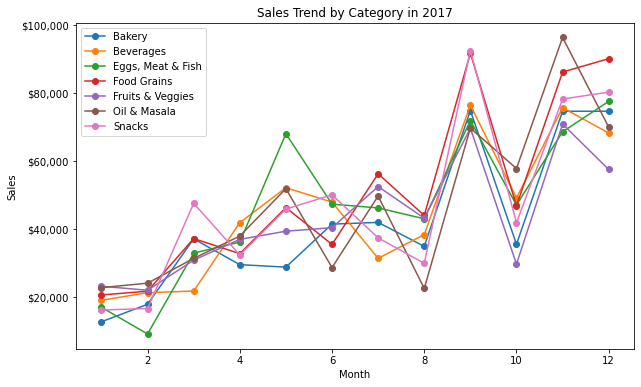

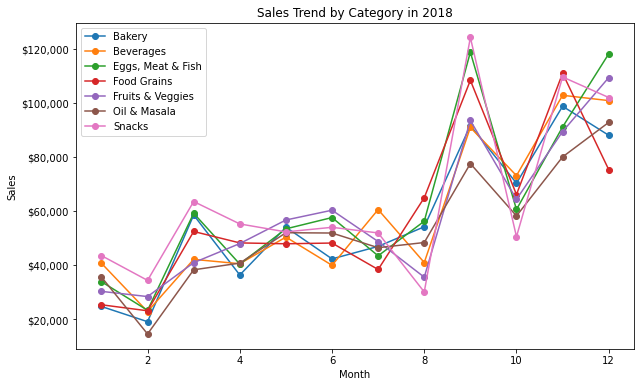

In [23]:
### 2017 LINE PLOT ###

# Group Category, Year & Month and calculate the sum of sales for each year
grouped_data = grocery_data.groupby(["Year", "Month", "Category"]).sum()

# Reset the index -> Year, Month and Category back as column
grouped_data = grouped_data.reset_index()

# Filter data for 2017
df_2017 = grouped_data[grouped_data['Year'] == 2017]

# Setting up
fig, ax = plt.subplots(figsize=(10, 6))

# Get the different unique categories (Seven types)
cat_2017 = df_2017['Category'].unique()

# Plotting
# Uses for loop. For every x in categories, a line will be plotted.
for category in cat_2017:
    
    # Creates new df called category_data. Filter to access the data for each category individually.
    # Checks if the "Category" column in the grouped_data df is = to the current category
    category_data = df_2017[df_2017['Category'] == category]
    
    # X-axis is the year, Y-axis is the money. Marker -> to mark each year.
    ax.plot(category_data['Month'], category_data['Sales'], marker='o', linestyle='-', label=category)

# Labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.set_title('Sales Trend by Category in 2017')

# Firstly, format. Dollar sign then having a comma as seperator (easier to see) and zero decimal place.
fmt = '${x:,.0f}'

#Used StrMethodFormatter as there doesn't seem to be a formatter for currency...The closest would be to use string
tick = mtick.StrMethodFormatter(fmt)

#Gets current axis -> Y-axis -> Format it based on code above
plt.gca().get_yaxis().set_major_formatter(tick)

# Add legend 
ax.legend()

# Show the plot
plt.show()



### 2018 PLOT ###

# Do the same for 2018. Some variables can be re-used from previous code.

# Setting up
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Filter data for 2018
df_2018 = grouped_data[grouped_data['Year'] == 2018]

# Get the different unique categories (Seven types)
cat_2018 = df_2018['Category'].unique()

# Plotting
# Uses for loop. For every x in categories, a line will be plotted.
for category in cat_2018:
    
    # Creates new df called category_data. Filter to access the data for each category individually.
    # Checks if the "Category" column in the grouped_data df is = to the current category
    category_data = df_2018[df_2018['Category'] == category]
    
    # X-axis is the year, Y-axis is the money. Marker -> to mark each year.
    ax2.plot(category_data['Month'], category_data['Sales'], marker='o', linestyle='-', label=category)

# Labels and title
ax2.set_xlabel('Month')
ax2.set_ylabel('Sales')
ax2.set_title('Sales Trend by Category in 2018')

# Firstly, format. Dollar sign then having a comma as seperator (easier to see) and zero decimal place.
fmt = '${x:,.0f}'

#Used StrMethodFormatter as there doesn't seem to be a formatter for currency...The closest would be to use string
tick = mtick.StrMethodFormatter(fmt)

#Gets current axis -> Y-axis -> Format it based on code above
plt.gca().get_yaxis().set_major_formatter(tick)

# Add legend 
ax2.legend()

# Show the plot
plt.show()

These are my findings based on the graphs above:

1) The first half of the year will have have low sales ( < $60,000). However, Snacks seems to always be higher than every category in the month of March. From research, March is the beginning of summer vacation in many schools across India. Hence, this could be contributed to a few factors such as marketing promotion or school holidays (which prompts children/teenagers to purchase snacks to be consumed at home). 

2) An outlier to this is Eggs, Meat and Fish category which has a spiked in May. This could also be contributed to factors like festivals or events which requires more demand.

3) Sales will start to rise towards the 2nd half of the year. Particularly, in September where all categories will have a sharp spike due to increase of sales. It then shows a trend of a temporary decrease in sales in October before rising in November. Further analysis is required to determine why there is a sharp spike in September and why there is a decrease in sales during October and the rebound in November.

#### Focusing on the Sub-Category:

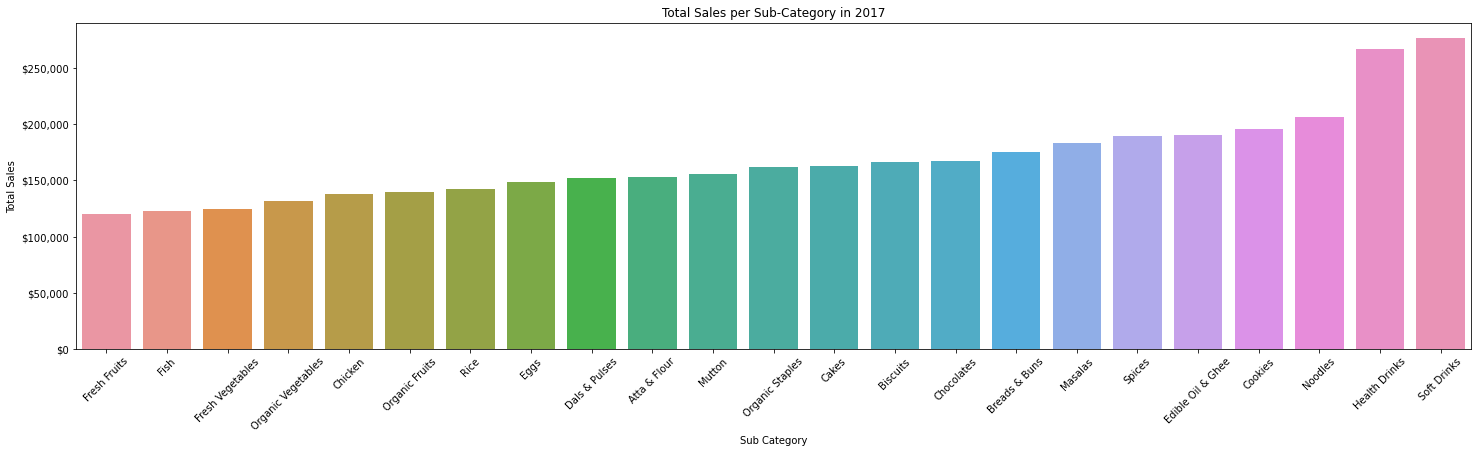

In [24]:
# matplotlib graph seems compressed so I switched to seaborn.

# Group the data and calculating total sales per sub category
df3 = grocery_data.groupby(["Year", "Sub Category"]).sum()

# Reset the index -> Year, Month and Category back as column
df3 = df3.reset_index()

sub_cat= df3[df3['Year'] == 2017]

# Sort in asc order
sub_cat_sorted = sub_cat.sort_values('Sales', ascending=True)

# Fig & axes
fig, ax = plt.subplots(figsize=(25, 6))

# Plot using seaborn
sns.barplot(x='Sub Category', y='Sales', data=sub_cat_sorted, ax=ax)

# Set x-axis label
ax.set_xlabel('Sub Category')

# Set y-axis label
ax.set_ylabel('Total Sales')

# Set title
ax.set_title('Total Sales per Sub-Category in 2017')

# Rotate x-axis labels because it will overlap if it isn't
plt.xticks(rotation=45)

# Firstly, format. Dollar sign then having a comma as seperator (easier to see) and zero decimal place.
fmt = '${x:,.0f}'

#Used StrMethodFormatter as there doesn't seem to be a formatter for currency...The closest would be to use string
tick = mtick.StrMethodFormatter(fmt)

#Sets Y-axis -> Format it based on code above
ax.yaxis.set_major_formatter(tick)

# Display the plot
plt.show()


**Insight:**

1) Drinks are the sub-category with the highest sales in 2017, indicating a strong performance in that category. However, in terms of category, Beverages is the 2nd Highest.
2) The Fruit & Veggies category has the lowest sales among the sub-categories, specifically for Fresh Fruits, Organic Vegetables, and Fresh Vegetables.
3) Specific items within the Eggs, Meat & Fish category, such as Fish, Chicken, Mutton and Eggs, are on the lower spectrum of sales.

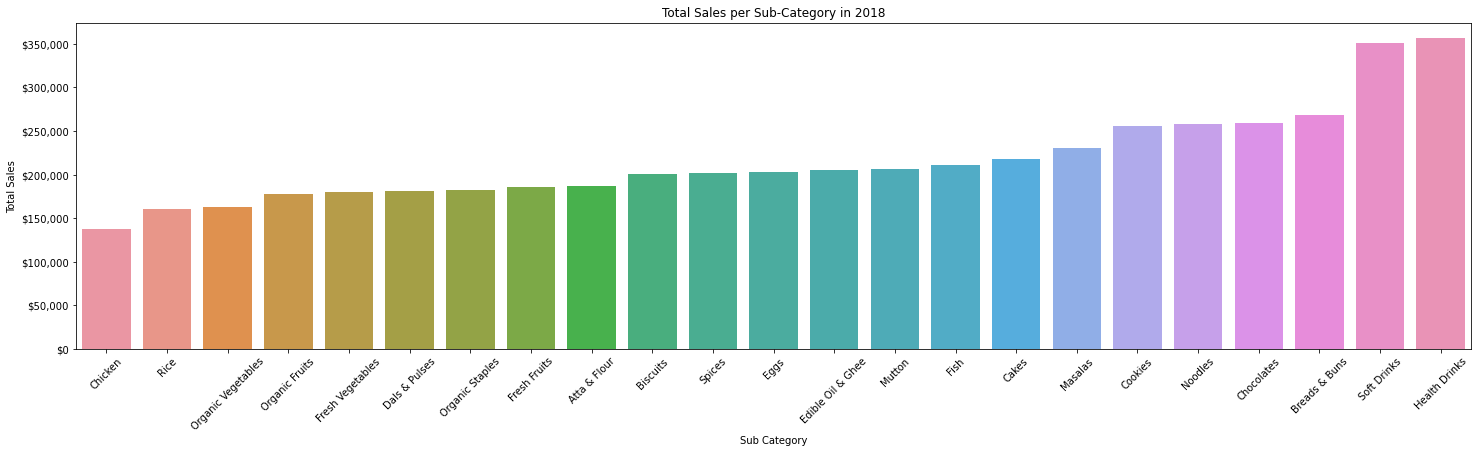

In [25]:
# 2018 plot

# Group the data and calculating total sales per sub category
df4 = grocery_data.groupby(["Year", "Sub Category"]).sum()

# Reset the index -> Year, Month and Category back as column
df4 = df4.reset_index()

sub_cat= df4[df4['Year'] == 2018]

# Sort in asc order
sub_cat_sorted = sub_cat.sort_values('Sales', ascending=True)

# Fig & axes
fig, ax = plt.subplots(figsize=(25, 6))

# Plot using seaborn
sns.barplot(x='Sub Category', y='Sales', data=sub_cat_sorted, ax=ax)

# Set x-axis label
ax.set_xlabel('Sub Category')

# Set y-axis label
ax.set_ylabel('Total Sales')

# Set title
ax.set_title('Total Sales per Sub-Category in 2018')

# Rotate x-axis labels because it will overlap if it isn't
plt.xticks(rotation=45)

# Firstly, format. Dollar sign then having a comma as seperator (easier to see) and zero decimal place.
fmt = '${x:,.0f}'

#Used StrMethodFormatter as there doesn't seem to be a formatter for currency...The closest would be to use string
tick = mtick.StrMethodFormatter(fmt)

#Sets Y-axis -> Format it based on code above
ax.yaxis.set_major_formatter(tick)

# Display the plot
plt.show()


**Insight:**

1) There seems to be an increase of sales overall.

2) Drinks are _still_ the most sub-categories that have the most sales. Using the Health Drinks as an example, in 2017, there was \\$266848 but in 2018 the sales is \\$356324. There is an increase of **33.50%** for this sub-category alone.

3) Snacks have move up the tier and generating more sales than 2017 (Chocolates, Cookies, Ect)

4) Lest category is surprisingly Chicken and Rice. The other sub-categories from the lower tier consists of the Fruit & Veggies Category (Fresh Fruits, Organic Veg, Fresh Veg).

5) Even though Eggs, Meat and Fish is the 2nd most selling category in 2018, Chicken generates the least sales. Mutton, Fish and Eggs are carrying this category. A simple research shows that in India the most most common meat item are Mutton. Since there are some citizens that are unable to eat beef, meat dishes uses mutton instead.



#### Short Insight on Discounts

In [26]:
# This was a Simplified code to see the data but filtered to 'Health Drinks'.
# Used to get the stats above.
# However, I saw an interesting insight so I left this in.

# Group data and sum it up.
grouped_data = grocery_data.groupby(["Year", "Sub Category"]).sum()

# Reset the index to get the column 
grouped_data = grouped_data.reset_index()

# Filter to Health Drinks
sub_cat_sales = grouped_data.loc[grouped_data['Sub Category'] == 'Health Drinks']
sub_cat_sales2 = grouped_data.loc[grouped_data['Sub Category'] == 'Chicken']

print(sub_cat_sales)

print("\n", sub_cat_sales2)




    Year   Sub Category   Sales  Discount    Profit  Month
13  2015  Health Drinks  224977     33.56  59367.89   1130
36  2016  Health Drinks  203290     33.31  52808.88   1059
59  2017  Health Drinks  266848     43.77  65084.18   1470
82  2018  Health Drinks  356324     55.85  90208.84   1830

     Year Sub Category   Sales  Discount    Profit  Month
4   2015      Chicken  118173     18.53  32353.11    607
27  2016      Chicken  126313     17.94  30110.77    700
50  2017      Chicken  138076     21.03  30772.65    753
73  2018      Chicken  137935     22.16  30813.36    733


**Insight:**

1) It seems like the discount in overall for the sub-category has also risen over the years. 

2) In 2016, when the discount decreased for Health Drinks, the sales also experienced a decline. This suggests a positive correlation between the discount offered and the sales generated. However, for the Chicken sub-category, a decrease in the discount in 2016 did not result in a significant decline in sales. This indicates that factors other than the discount might be influencing the sales of Chicken.

3) In 2016, the decrease in discount (from 33.56 to 33.31) for Health Drinks was accompanied by a drop in both sales and profits. This implies that a reduction in the discount affects the customer demand and the profitability of the category. On the other hand, despite the decrease in discount for Chicken in 2016, sales continued to rise. However, profit showed a decline. This suggests that while sales increased, the profitability decreased.

4) In 2017, both Health Drinks and Chicken has an increase in the discount. This resulted in a subsequent rise in both sales and profits for these sub-categories. This implies that a **higher discount motivated customers to purchase more, leading to increased sales and improved profitability**.



### Summary of Findings


Total Sales and Profit:

- Central Region has the highest sales, followed by East, South, and West.
- Sales and profit have been increasing steadily over the years.


Total Sales and Profit per Category:

- "Eggs, Meat & Fish" is the category with the highest sales and profit.
- "Snacks" and "Food Grains" also perform well.
- "Oil & Masala," "Beverages," and "Bakery" have lower sales and profit.

Sales Trend over Time + In-depth look into 2017 & 2018:

- Overall, all categories show significant sales growth over the years, indicating strong customer demand.
- Food and Grains had the highest sales in 2017 but dipped in 2018.
- September shows a sharp spike in sales for all categories, followed by a temporary decrease in October and a rebound in November.
- Snacks seems to always be higher than every category in the month of March

Focusing on Sub-Categories:

- Drinks, particularly Health Drinks, have the highest sales in both 2017 and 2018.
- Snacks have shown an increase in sales, including Chocolates and Cookies.
- Chicken and Rice have the lowest sales among sub-categories. Followed by Fruit & Veggies Category 
- Mutton, Fish, and Eggs contribute more to the sales of Eggs, Meat & Fish category.

Insights on Discounts:

- Discounts have generally increased over the years for sub-categories.
- The correlation between discounts and sales varies across sub-categories.
- Higher discounts in 2017 for both Health Drinks and Chicken resulted in increased sales and profit.

### Conclusion

A few things that can be done to increase overall sales and profitability even further in the continuous years:
    
1) "Beverages" category is expected to continue having more sales in the future. A promotional strategy could be implemented where customers who buy two beverages can receive a discount on the "Fruit & Veggies Category." This cross-promotion can encourage customers to explore different categories and increase overall sales.

2) Similarly, since snacks consistently have higher sales in the month of March, a promotional strategy could be designed where customers who purchase three snacks receive a larger discount on other categories like "Oil & Masala," "Fruit & Veggies Category," and "Bakery." This approach targets parents or adults who are likely accompanying children purchasing snacks, providing an incentive for them to buy more items in the other categories.

2) To increase sales and profit in other regions, it is recommended to implement more discounts in those regions (East, South & West). By offering targeted promotions and discounts, the store can attract customers and stimulate sales growth in regions where sales are relatively lower.

3) It is recommended to distribute discounts more evenly throughout the year to create a natural sales trend over the months. This can help avoid sudden spikes in sales (September, November) followed by temporary decreases. There might still be a few unknown factors such as consumers having more money during the second half of the year which makes sales so high. Thus, taking that into consideration, it may also be beneficial to offer bigger discounts during those month (such as September) to take advantage of increased consumer spending.

4) Although "Eggs, Meat & Fish" category is the highest selling category overall, when you look into the recent years, the sub-categories for it do not produce much sales. Thus, I reccomend that the supermarket can expand on the variety and quality of products within this category. An example would be introducing new cuts of meat or premium fish options which will attract more customers and potentially increase sales even further.

5) Implementing a loyalty program or reward system to encourage repeat purchases and foster customer loyalty. This includes further exclusive discounts or special benefits to loyal customers.


